#           HILL AND VALLEY PREDICTION

Objective:

The primary objective of this project in Google Colab is to work with a dataset that consists of records representing 100 points on a two-dimensional graph. These points are arranged in a specific order, from 1 to 100, on the Y-coordinate. The goal is to create meaningful visualizations of these points on a graph, where they form either "hills" or "valleys."

To achieve this objective, we need to:

1.Understand the data format, which includes 100 numeric values representing the X-coordinates (1-100) and a binary "Class" value (0 or 1) indicating whether the points create a "valley" or a "hill."

2.Process and analyze the data to accurately plot these points on a graph.

3.Visualize the resulting terrain-like shapes to gain insights or make informed decisions based on the data.

This project aims to explore and analyze the patterns and shapes created by these points, enabling us to draw meaningful conclusions from the data

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Hill%20Valley%20Dataset.csv')

In [5]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
0,39.02,36.49,38.20,38.85,39.38,39.74,37.02,39.53,38.81,38.79,...,36.62,36.92,38.80,38.52,38.07,36.73,39.46,37.50,39.10,0
1,1.83,1.71,1.77,1.77,1.68,1.78,1.80,1.70,1.75,1.78,...,1.80,1.79,1.77,1.74,1.74,1.80,1.78,1.75,1.69,1
2,68177.69,66138.42,72981.88,74304.33,67549.66,69367.34,69169.41,73268.61,74465.84,72503.37,...,73438.88,71053.35,71112.62,74916.48,72571.58,66348.97,71063.72,67404.27,74920.24,1
3,44889.06,39191.86,40728.46,38576.36,45876.06,47034.00,46611.43,37668.32,40980.89,38466.15,...,42625.67,40684.20,46960.73,44546.80,45410.53,47139.44,43095.68,40888.34,39615.19,0
4,5.70,5.40,5.28,5.38,5.27,5.61,6.00,5.38,5.34,5.87,...,5.17,5.67,5.60,5.94,5.73,5.22,5.30,5.73,5.91,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Columns: 101 entries, V1 to Class
dtypes: float64(100), int64(1)
memory usage: 956.5 KB


In [7]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,...,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,8169.091881,8144.306262,8192.653738,8176.868738,8128.297211,8173.030008,8188.582748,8183.641543,8154.670066,8120.767574,...,8120.056815,8125.917409,8158.793812,8140.885421,8213.480611,8185.594002,8140.195355,8192.960891,8156.197376,0.500000
std,17974.950461,17881.049734,18087.938901,17991.903982,17846.757963,17927.114105,18029.562695,18048.582159,17982.390713,17900.798206,...,17773.190621,17758.182403,17919.510371,17817.945646,18016.445265,17956.084223,17768.356106,18064.781479,17829.310973,0.500206
min,0.920000,0.900000,0.850000,0.890000,0.880000,0.860000,0.870000,0.650000,0.650000,0.620000,...,0.870000,0.900000,0.870000,0.880000,0.890000,0.890000,0.860000,0.910000,0.890000,0.000000
25%,19.602500,19.595000,18.925000,19.277500,19.210000,19.582500,18.690000,19.062500,19.532500,19.285000,...,19.197500,18.895000,19.237500,19.385000,19.027500,19.135000,19.205000,18.812500,19.145000,0.000000
50%,301.425000,295.205000,297.260000,299.720000,295.115000,294.380000,295.935000,290.850000,294.565000,295.160000,...,297.845000,295.420000,299.155000,293.355000,301.370000,296.960000,300.925000,299.200000,302.275000,0.500000
75%,5358.795000,5417.847500,5393.367500,5388.482500,5321.987500,5328.040000,5443.977500,5283.655000,5378.180000,5319.097500,...,5355.355000,5386.037500,5286.385000,5345.797500,5300.890000,5361.047500,5390.850000,5288.712500,5357.847500,1.000000
max,117807.870000,108896.480000,119031.350000,110212.590000,113000.470000,116848.390000,115609.240000,118522.320000,112895.900000,117798.300000,...,113858.680000,112948.830000,112409.570000,112933.730000,112037.220000,115110.420000,116431.960000,113291.960000,114533.760000,1.000000


In [8]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       ...
       'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100',
       'Class'],
      dtype='object', length=101)

In [11]:
print(df.columns.tolist())

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'Class']


In [13]:
df.shape

(1212, 101)

In [18]:
df['Class'].value_counts()

,count
Class,
0,606
1,606


In [20]:
df.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
Class,,,,,,,,,,,,,,,,,,,,,
0,7913.333251,7825.339967,7902.497294,7857.032079,7775.610198,7875.436337,7804.166584,7722.324802,7793.328416,7686.782046,...,7753.427244,7737.843366,7799.332079,7825.211700,7791.354010,7927.237112,7874.502343,7844.227459,7875.338713,7855.181172
1,8424.850512,8463.272558,8482.810182,8496.705396,8480.984224,8470.623680,8572.998911,8644.958284,8516.011716,8554.753102,...,8478.513399,8502.270264,8452.502739,8492.375924,8490.416832,8499.724109,8496.685660,8436.163251,8510.583069,8457.213581


In [21]:
y = df['Class']

In [22]:
y.shape

(1212,)

In [23]:
y

,Class
0,0
1,1
2,1
3,0
4,0
...,...
1207,1
1208,0
1209,1
1210,1


In [47]:
x =df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100']]

In [48]:
x =df.drop('Class', axis=1)

In [49]:
x.shape

(1212, 100)

In [27]:
x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
0,39.02,36.49,38.20,38.85,39.38,39.74,37.02,39.53,38.81,38.79,...,37.57,36.62,36.92,38.80,38.52,38.07,36.73,39.46,37.50,39.10
1,1.83,1.71,1.77,1.77,1.68,1.78,1.80,1.70,1.75,1.78,...,1.71,1.80,1.79,1.77,1.74,1.74,1.80,1.78,1.75,1.69
2,68177.69,66138.42,72981.88,74304.33,67549.66,69367.34,69169.41,73268.61,74465.84,72503.37,...,69384.71,73438.88,71053.35,71112.62,74916.48,72571.58,66348.97,71063.72,67404.27,74920.24
3,44889.06,39191.86,40728.46,38576.36,45876.06,47034.00,46611.43,37668.32,40980.89,38466.15,...,47653.60,42625.67,40684.20,46960.73,44546.80,45410.53,47139.44,43095.68,40888.34,39615.19
4,5.70,5.40,5.28,5.38,5.27,5.61,6.00,5.38,5.34,5.87,...,5.52,5.17,5.67,5.60,5.94,5.73,5.22,5.30,5.73,5.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,13.00,12.87,13.27,13.04,13.19,12.53,14.31,13.33,13.63,14.55,...,12.89,12.48,12.15,13.15,12.35,13.58,13.86,12.88,13.87,13.51
1208,48.66,50.11,48.55,50.43,50.09,49.67,48.95,48.65,48.63,48.61,...,47.45,46.93,49.61,47.16,48.17,47.94,49.81,49.89,47.43,47.77
1209,10160.65,9048.63,8994.94,9514.39,9814.74,10195.24,10031.47,10202.28,9152.99,9591.75,...,10413.41,9068.11,9191.80,9275.04,9848.18,9074.17,9601.74,10366.24,8997.60,9305.77
1210,34.81,35.07,34.98,32.37,34.16,34.03,33.31,32.48,35.63,32.48,...,33.18,32.76,35.03,32.89,31.91,33.85,35.28,32.49,32.83,34.82


In [28]:
import matplotlib.pyplot as plt


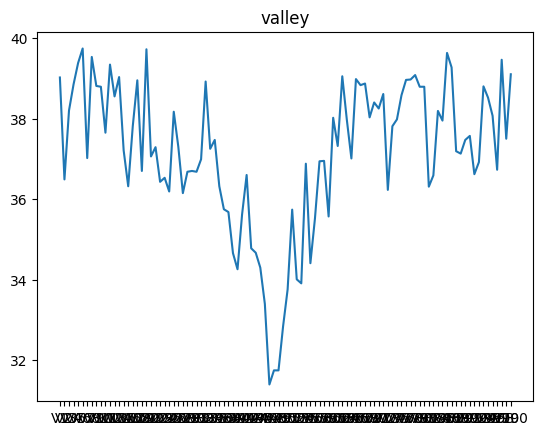

In [31]:
plt.plot(x.iloc[0,:])
plt.title('valley');

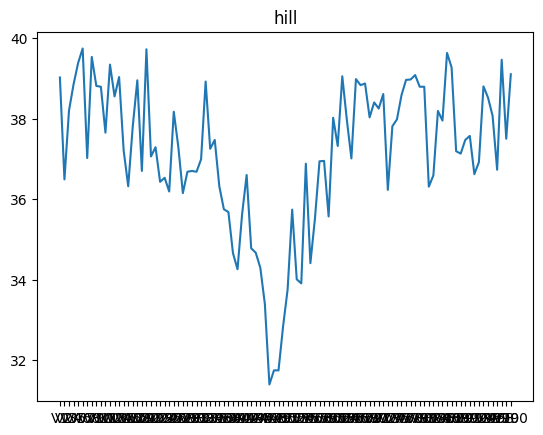

In [33]:
plt.plot(x.iloc[0,:])
plt.title('hill');

In [35]:
from sklearn.preprocessing import StandardScaler

In [37]:
ss= StandardScaler()

In [50]:
x = ss.fit_transform(x)

In [51]:
x.shape

(1212, 100)

In [52]:
x

array([[-0.45248681, -0.45361784, -0.45100881, ..., -0.45609618,
        -0.45164274, -0.45545496],
       [-0.45455665, -0.45556372, -0.45302369, ..., -0.45821768,
        -0.45362255, -0.45755405],
       [ 3.33983504,  3.24466709,  3.58338069, ...,  3.5427869 ,
         3.27907378,  3.74616847],
       ...,
       [ 0.11084204,  0.0505953 ,  0.04437307, ...,  0.12533312,
         0.04456025,  0.06450317],
       [-0.45272112, -0.45369729, -0.45118691, ..., -0.45648861,
        -0.45190136, -0.45569511],
       [ 0.01782872, -0.02636986,  0.05196137, ...,  0.03036056,
         0.01087365,  0.03123129]])

In [57]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2529)

In [59]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [60]:
model.fit(x_train,y_train)

LogisticRegression()

In [61]:
model.intercept_

array([0.01271529])

In [62]:
model.coef_

array([[-1.98740111, -1.6206787 , -1.6878109 , -1.56438469, -1.54333573,
        -1.34585829, -0.6694871 , -0.40200381, -0.50047109,  0.21439777,
         0.49844616,  0.36217626,  0.66614686,  0.54538238,  1.17819461,
         0.54202308,  0.19620748,  0.59881248,  0.25879233,  0.26884726,
         0.07982862, -0.18503434,  0.29535395,  0.23570812,  0.22088235,
         0.52526936,  0.27939047,  0.33696821,  0.27363863,  0.2135432 ,
         0.41606908,  0.2463718 ,  0.65245154,  0.16487891,  0.20178694,
         0.39454943,  0.30854861, -0.05809809,  0.49650654,  0.01362333,
         0.54940259,  0.45572134,  0.52288249,  0.34740094,  0.3169792 ,
         0.5352808 ,  0.25797903, -0.0110543 ,  0.09295009,  0.45638766,
         0.20452021,  0.31753996,  0.34281488,  0.30410382,  0.4943963 ,
         0.53015234,  0.12953678,  0.21049822,  0.12321888,  0.44547681,
         0.1014719 ,  0.36598752,  0.57239218,  0.1687619 ,  0.37211131,
         0.24578456,  0.22547375, -0.52596302, -0.2

In [68]:
y_pred = model.predict(x_test)

In [67]:
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [69]:
model.predict_proba(x_test)

array([[0.49481368, 0.50518632],
       [0.44339857, 0.55660143],
       [0.53504271, 0.46495729],
       [0.79858506, 0.20141494],
       [0.50138829, 0.49861171],
       [0.50783466, 0.49216534],
       [0.5081779 , 0.4918221 ],
       [0.5078313 , 0.4921687 ],
       [0.50904735, 0.49095265],
       [0.50789673, 0.49210327],
       [0.51017085, 0.48982915],
       [0.50779565, 0.49220435],
       [0.45748925, 0.54251075],
       [0.50786063, 0.49213937],
       [0.50976885, 0.49023115],
       [0.5159504 , 0.4840496 ],
       [0.50782853, 0.49217147],
       [0.50479052, 0.49520948],
       [0.5083683 , 0.4916317 ],
       [0.50781084, 0.49218916],
       [0.49510478, 0.50489522],
       [0.05601127, 0.94398873],
       [0.41182405, 0.58817595],
       [0.50798805, 0.49201195],
       [0.02207406, 0.97792594],
       [0.49485299, 0.50514701],
       [0.514828  , 0.485172  ],
       [0.50974558, 0.49025442],
       [0.45121596, 0.54878404],
       [0.50795131, 0.49204869],
       [0.

In [70]:
x_new = df.sample(1)

In [71]:
x_new

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
374,56.15,52.47,47.78,54.28,47.45,57.99,58.17,49.91,58.78,50.07,...,55.04,58.84,58.66,51.14,56.79,57.88,58.56,57.08,52.19,1


In [72]:
x_new.shape

(1, 101)

In [74]:
x_new = x_new.drop('Class', axis =1)

In [75]:
x_new

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
374,56.15,52.47,47.78,54.28,47.45,57.99,58.17,49.91,58.78,50.07,...,46.94,55.04,58.84,58.66,51.14,56.79,57.88,58.56,57.08,52.19


In [76]:
x_new = ss.transform(x_new)

In [77]:
y_pred_new = model.predict(x_new)

In [78]:
y_pred_new

array([0])

In [79]:
model.predict_proba(x_new)

array([[0.50720435, 0.49279565]])

EXPLANATION

As earlier mentioned the objective of this project is to perform hill and valley prediction using logistic regression on a dataset containing 100 points on a two-dimensional graph. These points are arranged in a specific order on the Y-coordinate and are labeled as either "hills" or "valleys."

Here's a step-by-step breakdown of the tasks:

1.Understanding the Data Format:

The dataset contains 100 numeric values representing the X-coordinates (ranging from 1 to 100) and a binary "Class" value (0 or 1) indicating whether the points create a "valley" or a "hill."

2.Importing Libraries:

The necessary libraries, such as Pandas and NumPy, are imported to work with the data.

3.Importing the Dataset:

The dataset is loaded into a Pandas DataFrame directly from a URL.
Exploratory Data Analysis:

Information about the DataFrame is obtained using df.info(), and summary statistics are generated using df.describe().
Column names are retrieved with df.columns.tolist().

4.Defining Dependent and Independent Variables:

The target variable 'y' is defined as the 'Class' column, and its shape and contents are examined.
The feature matrix 'X' is created by dropping the 'Class' column.

5.Standardizing the Data:

Standardization of the feature matrix 'X' is performed using Scikit-Learn's StandardScaler to ensure that all features have a mean of 0 and standard deviation of 1.

6.Train-Test Split:

The dataset is split into training and testing sets using train_test_split from Scikit-Learn. A 70-30 split ratio is chosen, and stratification is applied based on the 'Class' labels.

7.Model Training:

A logistic regression model is created using Scikit-Learn's LogisticRegression, and it is fitted to the training data using lr.fit(X_train, y_train).

8.Model Prediction:

The model is used to make predictions on the test set, and the predicted labels are stored in 'y_pred'.

9.Probability Predictions:

The probabilities of each class (0 and 1) for the test set are obtained using lr.predict_proba(X_test).

This project is aimed at analyzing the dataset to determine if logistic regression can effectively classify points as either hills or valleys based on their coordinates. The resulting predictions and probability scores can be further analyzed and visualized to gain insights into the dataset.